In [1]:
# Notebook for testing the GWB

from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', font_scale=1.5, rc={"figure.figsize":(8,5)})

# Test plots

In [2]:
l_max = 1000
common_settings = {
    'output':'gwCl',
    # 'output':'gwCl',
    # 'gravitational_wave_contributions': 'tsw, eisw, lisw',
    'gravitational_wave_contributions': 'tsw',
    'tau_ini_gwb':'1e-2',
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()

M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)

In [3]:
M.raw_cl()

{'gwb': array([0.00000000e+00, 0.00000000e+00, 1.29458246e-09, ...,
        5.79307155e-15, 5.78016525e-15, 5.76730435e-15]),
 'ell': array([   0,    1,    2, ...,  998,  999, 1000])}

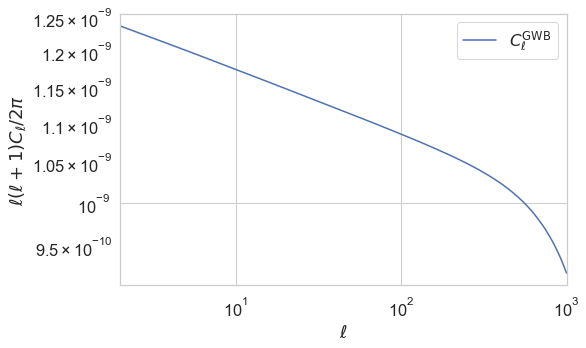

In [4]:
plt.figure()
plt.xlim([2,l_max])
plt.xscale('log');plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")

ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
plt.plot(ell,factor*cl['gwb'],label=r'$C_\ell^\mathrm{GWB}$')
# plt.plot(ell,factor*cl['tt'],label=r'$C_\ell^\mathrm{TT}$')
# plt.plot(ell,factor*cl['tgwb'],label=r'$C_\ell^\mathrm{TGWB}$')

plt.legend()

No handles with labels found to put in legend.


dict_keys(['k [1/Mpc]', 'P_scalar(k)'])


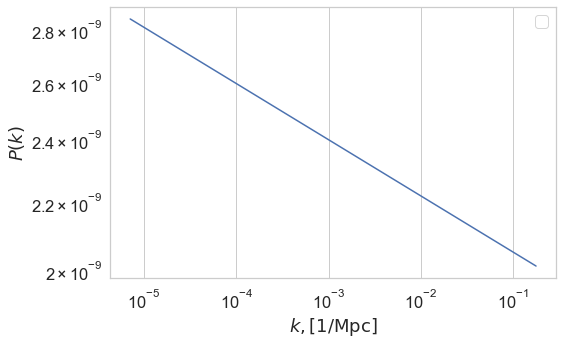

In [5]:
prim = M.get_primordial()
print(prim.keys())

plt.figure()
plt.xlabel(r"$k , [1/\mathrm{Mpc}]$")
plt.ylabel(r"$P(k)$")

plt.plot(prim['k [1/Mpc]'], prim['P_scalar(k)'])

plt.xscale('log')
plt.yscale('log')

plt.legend()

# Reproduce plots from "Imprint of relalivistic partilces"

In [6]:
#Data of imprint of rel. par.
l_max = 1000
data_rel_par = np.genfromtxt('../output/imprint_rel_par.csv', skip_header=2, delimiter=',').T
label_rel_par = np.genfromtxt('../output/imprint_rel_par.csv', max_rows=1, delimiter=',', dtype=str)

#Computation with Class
common_settings = {
    'output':'gwCl',
    # 'gravitational_wave_contributions':'eisw, lisw',
    'tau_ini_gwb':1e-2,
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
gwcl = {}

#different times
tau_ini_gwb = np.logspace(-8, 1, 10)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    gwcl.update({tau: factor * cl['gwb']})
    M.empty()

#different contributions
M.set(common_settings)
M.set({'gravitational_wave_contributions': 'tsw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'tsw': factor * cl['gwb']})
M.empty()

M.set(common_settings)
M.set({'gravitational_wave_contributions': 'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'isw': factor * cl['gwb']})
M.empty()

M.set(common_settings)
M.set({'gravitational_wave_contributions': 'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'tsw+isw': factor * cl['gwb']})
M.empty()

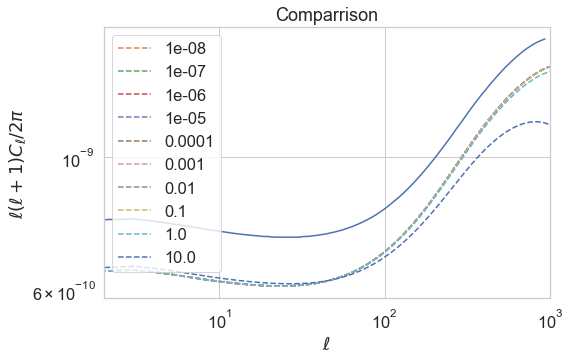

In [7]:
# Comparisson
plt.figure()
plt.title('Comparrison')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 12
plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i+1])
for tau in tau_ini_gwb:
    plt.plot(ell, gwcl[tau], '--', label=tau)
plt.legend()

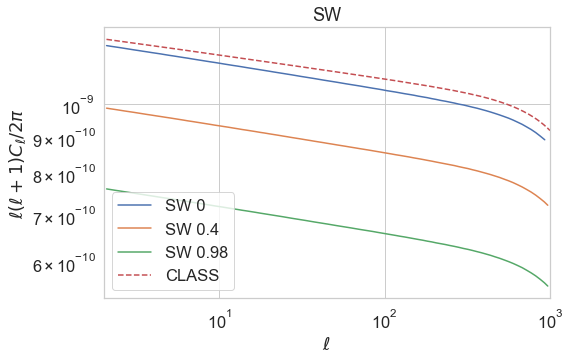

In [8]:
# SW
plt.figure()
plt.title('SW')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 6, 2):
    plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i])
plt.plot(ell, gwcl['tsw'], '--', label='CLASS')
plt.legend()

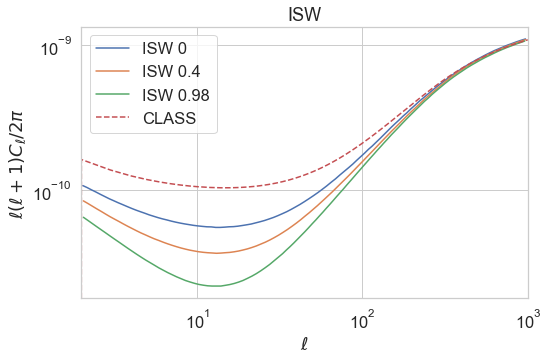

In [9]:
# ISW
plt.figure()
plt.title('ISW')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xscale('log'); plt.yscale('log')
plt.xlim([2,l_max])
for i in range(6, 12, 2):
    plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i])
plt.plot(ell, gwcl['isw'], '--', label='CLASS')
plt.legend()

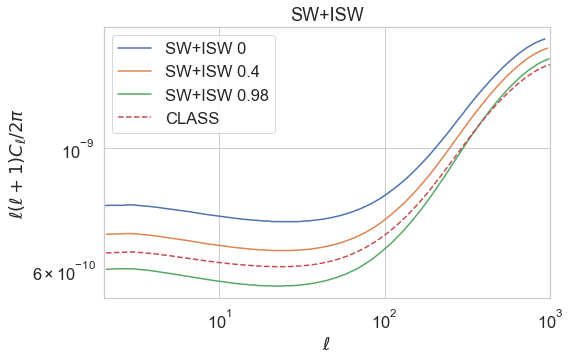

In [10]:
# SW+ISW
plt.figure()
plt.title('SW+ISW')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(12, 18, 2):
    plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i])
plt.plot(ell, gwcl['tsw+isw'], '--', label='CLASS')
plt.legend()

# Reproduce plots from "Cross-correlating CGWB and CMB"

In [11]:
#Data of cross-cor.
l_max = 1000
data_cross_cor = np.genfromtxt('../output/cross_cor.csv', skip_header=2, delimiter=',').T
label_cross_cor = np.genfromtxt('../output/cross_cor.csv', max_rows=1, delimiter=',', dtype=str)

#Computation with Class
common_settings = {
    'output':'tCl, gwCl',
    # 'temperature_contributions':'tsw, eisw, lisw', #don't include doppler effect!
    'temperature_contributions':'tsw',
    # 'gravitational_wave_contributions':'tsw, eisw, lisw',
    'gravitational_wave_contributions':'eisw, lisw',
    'tau_ini_gwb':1e-2,
    # 'tau_ini_gwb':50,
    'convert_gwb_to_energydensity':'yes',
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
tgwcl = {}

#different times
tau_ini_gwb = np.logspace(-2, 2, 5)
tau_ini_gwb = np.linspace(50, 100, 6)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    tgwcl.update({tau: factor * cl['tgwb']})
    M.empty()

#different contributions
M.set(common_settings)
M.set({
    'temperature_contributions':'tsw, eisw, lisw',
    'gravitational_wave_contributions':'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'CMBxCGWB': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'tsw',
    'gravitational_wave_contributions':'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'FSMxISW': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'eisw, lisw',
    'gravitational_wave_contributions':'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'ISWxISW': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'tsw',
    'gravitational_wave_contributions':'tsw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'FSMxFSM': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'eisw, lisw',
    'gravitational_wave_contributions':'tsw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'ISWxFSM': factor * cl['tgwb']})
M.empty()

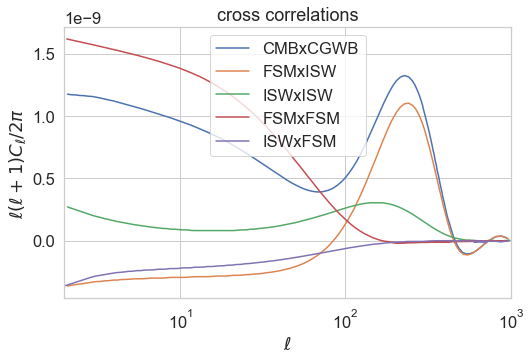

In [12]:
# original plot
plt.figure()
plt.title('cross correlations')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 10, 2):
    plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.legend()

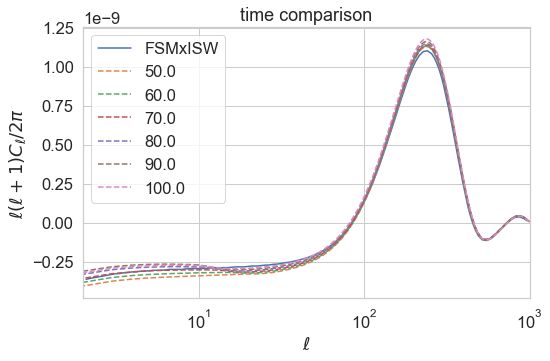

In [13]:
# time comparison
plt.figure()
plt.title('time comparison')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 2
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
for tau in tau_ini_gwb:
    plt.plot(ell, tgwcl[tau], '--', label=tau)
plt.legend()

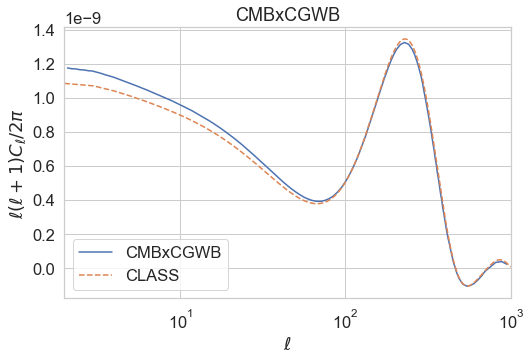

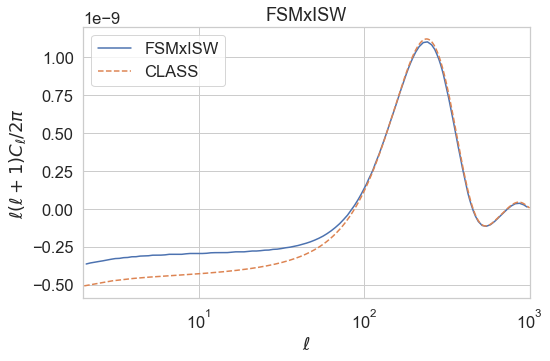

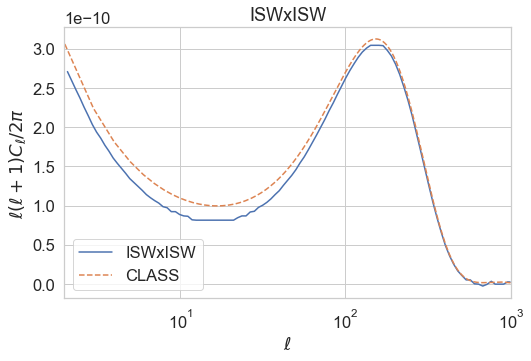

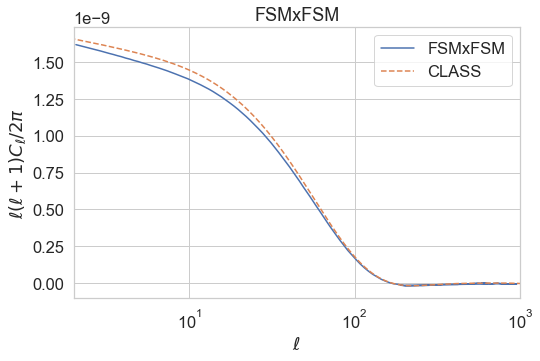

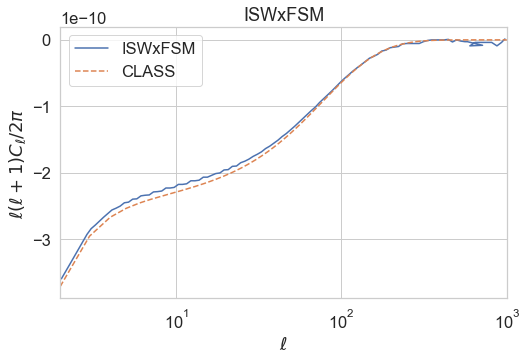

In [14]:
# comparison plots
plt.figure()
plt.title('CMBxCGWB')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 0
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['CMBxCGWB'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('FSMxISW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 2
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['FSMxISW'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('ISWxISW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 4
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['ISWxISW'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('FSMxFSM')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 6
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['FSMxFSM'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('ISWxFSM')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 8
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['ISWxFSM'], '--', label='CLASS')
plt.legend()

# Reproduce plots from "Cross-crorrelating - include Doppler effect"

In [15]:
#Data of cross-cor.-dop
l_max = 1000
data_cross_cor = np.genfromtxt('../output/cross_cor_dop.csv', skip_header=2, delimiter=',').T
label_cross_cor = np.genfromtxt('../output/cross_cor_dop.csv', max_rows=1, delimiter=',', dtype=str)

#Computation with Class
common_settings = {
    'output':'tCl, gwCl',
    'temperature_contributions':'tsw, eisw, lisw, dop', #include doppler effect!
    'gravitational_wave_contributions':'tsw, eisw, lisw',
    'tau_ini_gwb':1e-2,
    # 'tau_ini_gwb':50,
    'convert_gwb_to_energydensity':'yes',
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
tgwcl = {}

#different times
tau_ini_gwb = np.logspace(-2, 2, 5)
tau_ini_gwb = np.linspace(50, 100, 6)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    tgwcl.update({tau: factor * cl['tgwb']})
    M.empty()

#different contributions
M.set(common_settings)
M.set({
    'temperature_contributions':'tsw, eisw, lisw, dop',
    'gravitational_wave_contributions':'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'CMBxCGWB w Doppler': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'tsw, eisw, lisw',
    'gravitational_wave_contributions':'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'CMBxCGWB no Doppler': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'dop',
    'gravitational_wave_contributions':'tsw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'DOPxSW': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'dop',
    'gravitational_wave_contributions':'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'DOPxISW': factor * cl['tgwb']})
M.empty()

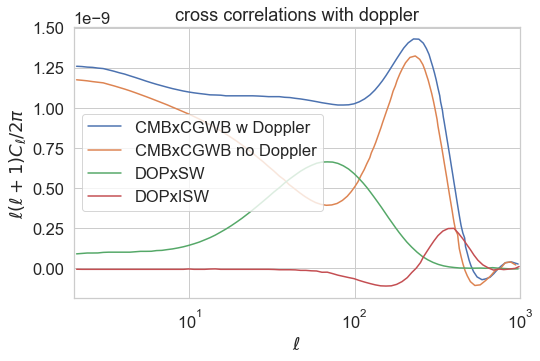

In [16]:
# original plot
plt.figure()
plt.title('cross correlations with doppler')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 8, 2):
    plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.legend()

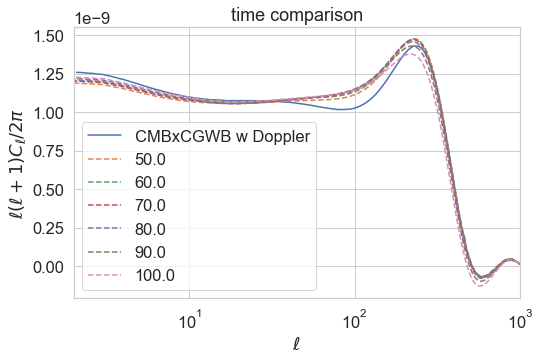

In [17]:
# time comparison
plt.figure()
plt.title('time comparison')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 0
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
for tau in tau_ini_gwb:
    plt.plot(ell, tgwcl[tau], '--', label=tau)
plt.legend()

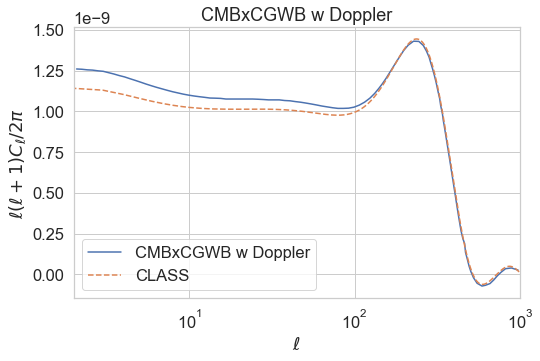

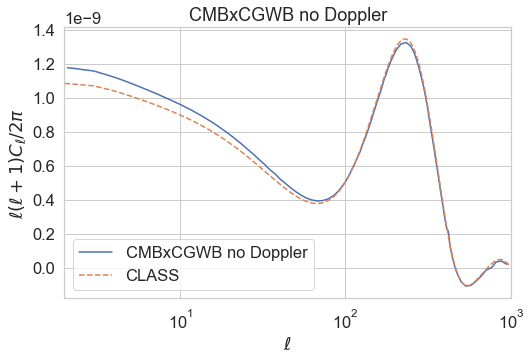

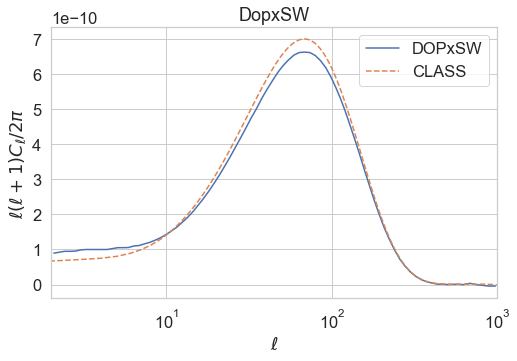

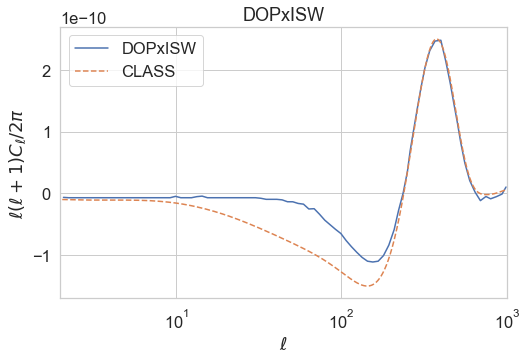

In [18]:
# comparison plots
plt.figure()
plt.title('CMBxCGWB w Doppler')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 0
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['CMBxCGWB w Doppler'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('CMBxCGWB no Doppler')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 2
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['CMBxCGWB no Doppler'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('DopxSW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 4
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['DOPxSW'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('DOPxISW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 6
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['DOPxISW'], '--', label='CLASS')
plt.legend()

# Reproduce plots from "Anisotropy of phase transition GW"

In [19]:
#Data of phase tans.
l_max = 20000
l_max = 1000
data_phase_trans = np.genfromtxt('../output/phase_trans.csv', skip_header=2, delimiter=',').T
label_phase_trans = np.genfromtxt('../output/phase_trans.csv', max_rows=1, delimiter=',', dtype=str)

# Computation with Class
common_settings = {
    'output':'tCl, gwCl',
    'gravitational_wave_contributions':'tsw, eisw, lisw, ini',
    'tau_ini_gwb':10,
    'factor_gwb_ini_scalar': -1, #the value they state
    # 'factor_gwb_ini_scalar': -1/3, #this should be the correct value
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
cls = {'CMB': factor * cl['tt'], 'CGWB': factor * cl['gwb']}

#different times
tau_ini_gwb = np.logspace(-2, 2, 5)
tau_ini_gwb = np.linspace(0.1, 1, 5)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    cls.update({tau: factor * cl['gwb']})
    M.empty()

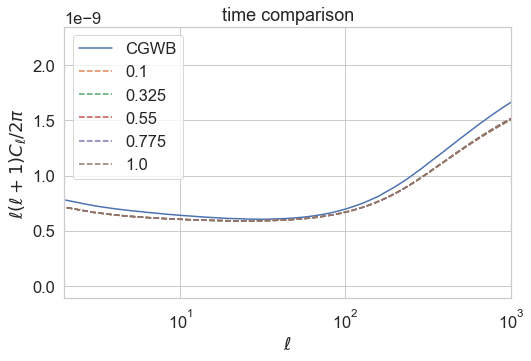

In [20]:
# time comparison
plt.figure()
plt.title('time comparison')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 2
plt.plot(data_phase_trans[i], data_phase_trans[i+1], label=label_phase_trans[i])
for tau in tau_ini_gwb:
    plt.plot(ell, cls[tau], '--', label=tau)
plt.legend()

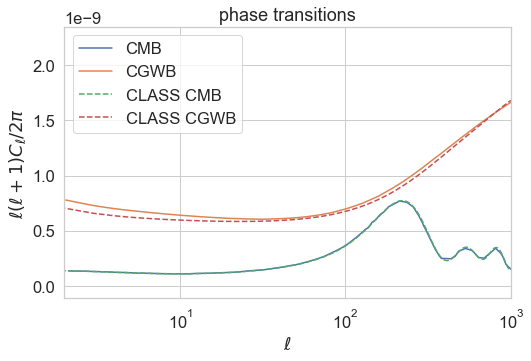

In [21]:
#plot with lake l_max
plt.figure()
plt.title('phase transitions')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 4, 2):
    plt.plot(data_phase_trans[i], data_phase_trans[i+1], label=label_phase_trans[i])
plt.plot(ell, cls['CMB'], '--', label='CLASS CMB')
plt.plot(ell, cls['CGWB'], '--', label='CLASS CGWB')
plt.legend()

# Analytic formulations for SW and ISW

In [22]:
from scipy.special import gamma
from scipy.special import spherical_jn

In [23]:
#set parameter CLASS
l_max = 1000
tau_ini_gwb = 1e-2 # in Mpc
factor_ini = 0.333
n_s = 0.9660499
n_s = 1.1
A_s = 2.100549e-09
k_pivot = 0.05
k_min = 1e-7
k_max = 1e-2
tau_0 = 1.4e4
tau_0 = 1.415190e+04 #Hacky hard codes way
cls = {}

In [24]:
data_class = np.genfromtxt('../output/test.dat', delimiter=',', skip_header=2, skip_footer=8)
data_class = data_class[data_class[:, 0].argsort(kind='stable')]
l_size = (int) (data_class[:, 0].max()) + 1
k_size = (int) (data_class[:, 1].max()) + 1
data_class = data_class.reshape((l_size, k_size, 9))

factor_class2 = data_class[:,0,2]*(data_class[:,0,2]+1.) / (2 * np.pi)

cl_class2_test = np.genfromtxt('../output/test_cl.dat').T

## SW+INI

In [25]:
#run CLASS
common_settings = {
    'output':'gwCl',
    'gravitational_wave_contributions':'tsw, ini',
    'tau_ini_gwb':tau_ini_gwb,
    # 'factor_gwb_ini_scalar': -1., #the value they state
    'factor_gwb_ini_scalar': 1/3, #this should be the correct value
    'l_max_scalars':l_max,
    'k_pivot': k_pivot,
    'A_s': A_s,
    'n_s': n_s,
    # 'k_max_tau0_over_l_max': 1e3,
    # 'transfer_verbose': 2,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell'][2:]
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
cls.update({'CLASS SW+INI': factor * cl['gwb'][2:]})


M.set(common_settings)
M.set({
    'gravitational_wave_contributions':'ini',
    # 'factor_gwb_ini_scalar': 1/3})
    'factor_gwb_ini_scalar': factor_ini})
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell'][2:]
factor = ell*(ell+1.) / (2 * np.pi)
# tau_0 = M.age() * Gyr_over_Mpc #No easy way of tranforming to conformal age...
cls.update({'CLASS 1/3': factor * cl['gwb'][2:]})

print('tau_0 = %e\n' % tau_0)

tau_0 = 1.415190e+04



In [26]:
"""analytic ecprerssion for SW"""
def analytic_SW(l, n):
    return gamma(l+n/2-1/2) * gamma(3-n) / (gamma(l+5/2-n/2) * np.power(gamma(2-n/2), 2)) \
        * np.power(2, n-2) * np.pi**2 / 9 * A_s * np.power(k_pivot * (tau_0-tau_ini_gwb), 1-n) \
        * factor_ini**2 * 9


# TODO_GWB: implement other language - python get overflows!

cls.update({'analytic SW': factor * analytic_SW(ell, n_s)})

/var/folders/7v/hknhl03n3x1_47zzz3qm78z80000gn/T/ipykernel_22982/2925351791.py:3: RuntimeWarning: invalid value encountered in true_divide
  return gamma(l+n/2-1/2) * gamma(3-n) / (gamma(l+5/2-n/2) * np.power(gamma(2-n/2), 2)) \


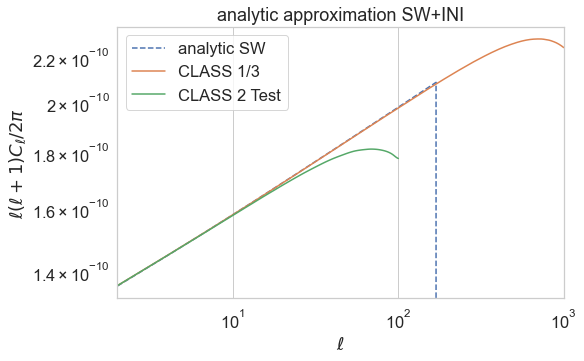

In [27]:
#plot
plt.figure()
plt.title('analytic approximation SW+INI')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
plt.plot(ell, cls['analytic SW'], '--', label='analytic SW')
# plt.plot(ell, cls['CLASS SW+INI'], '-', label='CLASS SW+INI')
plt.plot(ell, cls['CLASS 1/3'], '-', label='CLASS 1/3')
plt.plot(cl_class2_test[0], cl_class2_test[1], '-', label='CLASS 2 Test')
plt.legend()

# TODO_GWB: maybe problems with the power spectrum?

# cls['analytic SW'] / cls['CLASS 1/3']

7.066189996503675e-06 0.17749466774686318
7.066189996503675e-06 0.17749466774686318


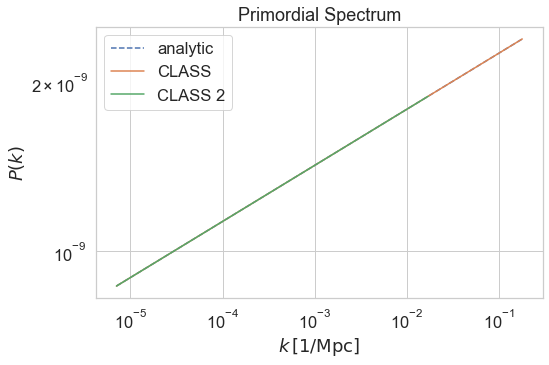

In [28]:
"""analytic primordial pectrum"""
def analytic_prim(k, A, n, kp):
    return A * np.power(k/kp, n-1)

prim = M.get_primordial()
k = prim['k [1/Mpc]']
k_min = k[0]; k_max = k[-1]
print(k_min, k_max)
# k_max *= 1e5
print(k_min, k_max)
k2 = np.logspace(np.log10(k_min), np.log10(k_max), 10000)
# k2 = k2 * 1e3
# k2 = k
prim_class = prim['P_scalar(k)']
prim_ana = analytic_prim(k2, A_s, n_s, k_pivot)


plt.figure()
plt.title('Primordial Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k \, [1/\mathrm{Mpc}]$")
plt.ylabel(r"$P(k)$")

plt.plot(k2, prim_ana, '--', label='analytic')
plt.plot(k, prim_class, '-', label='CLASS')
plt.plot(data_class[0,:,4], data_class[0,:,5], '-', label='CLASS 2')

plt.legend()

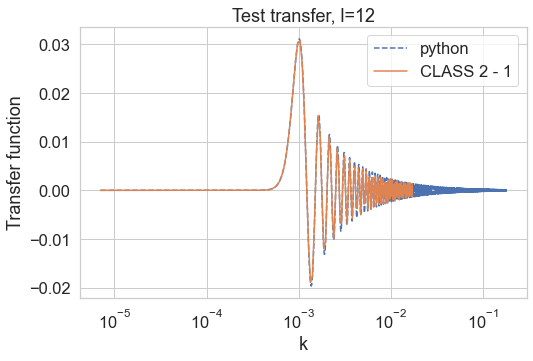

In [29]:
scaling1 = 1e3
scaling1 = 1

def transfer(x, l, tau0, tau_ini):
    return spherical_jn(l, x * (tau0 - tau_ini) * scaling1) * factor_ini

index_l = 10
l = (int) (data_class[index_l,0,2])
plt.figure()
plt.title("Test transfer, l=%i" % l)
plt.xscale('log')
plt.xlabel(r"k")
plt.ylabel("Transfer function")
plt.plot(k2, transfer(k2, l, tau_0, tau_ini_gwb), '--', label='python')
plt.plot(data_class[index_l,:,4], data_class[index_l,:,6], label='CLASS 2 - 1')
# plt.plot(data_class[index_l,:,4], data_class[index_l,:,7], label='CLASS 2 - 2')
plt.legend()

In [30]:
#Integrate by hand
def integrand(x, l, A, n, kp, tau0, tau_ini):
    return 4*np.pi/x  * analytic_prim(x, A, n, kp) \
        * np.power(transfer(x, l, tau0, tau_ini), 2)

cl_int = np.empty(ell.size)
for i, l in enumerate(ell):
    y = integrand(k, l, A_s, n_s, k_pivot, tau_0, tau_ini_gwb)
    cl_int[i] = np.trapz(y, k)

cl_int2 = np.empty(ell.size)
for i, l in enumerate(ell):
    y = integrand(k2, l, A_s, n_s, k_pivot, tau_0, tau_ini_gwb)
    cl_int2[i] = np.trapz(y, k2)

integrand_class2 = np.empty((l_size, k_size))
cl_class2 = np.empty(l_size)
for i in range(l_size):
    integrand_class2[i] = 4*np.pi/data_class[i,:,4] * data_class[i,:,5] * (data_class[i,:,6]*data_class[i,:,7])
    cl_class2[i] = np.trapz(integrand_class2[i], data_class[i,:,4])


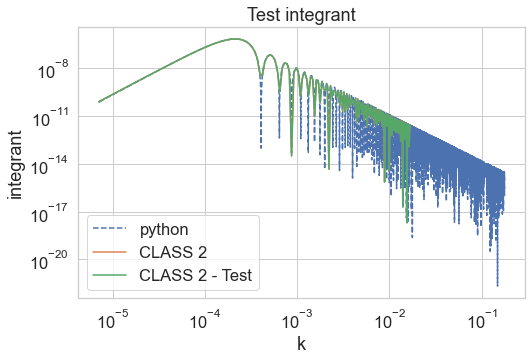

In [31]:
index_l = 0
l = (int) (data_class[index_l,0,2])
plt.figure()
plt.title('Test integrant')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"k")
plt.ylabel("integrant")
plt.plot(k2, integrand(k2, l, A_s, n_s, k_pivot, tau_0, tau_ini_gwb), '--', label='python')
plt.plot(data_class[index_l,:,4], integrand_class2[index_l], '-', label='CLASS 2')
plt.plot(data_class[index_l,:,4], data_class[index_l,:,8], '-', label='CLASS 2 - Test')
plt.legend()

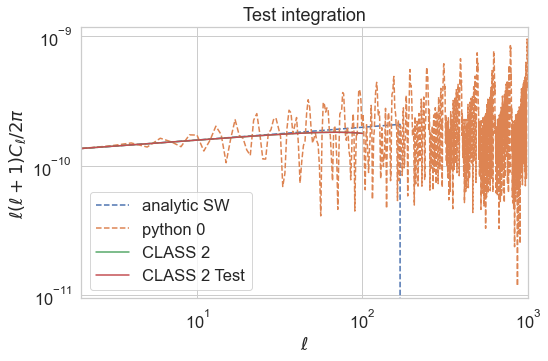

In [32]:
#plot
plt.figure()
plt.title('Test integration')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])

plt.plot(ell, cls['analytic SW'], '--', label='analytic SW')
# plt.plot(ell, cls['CLASS 1/3'], '-', label='CLASS 1/3')
plt.plot(ell, factor*cl_int, '--', label='python 0')
# plt.plot(ell, factor*cl_int2, '--', label='pyhton')
plt.plot(data_class[:,0,2], factor_class2*cl_class2, '-', label='CLASS 2')
plt.plot(cl_class2_test[0], cl_class2_test[1], '-', label='CLASS 2 Test')

plt.legend()

## ISW

In [33]:
#run CLASS
common_settings = {
    'output':'gwCl',
    'gravitational_wave_contributions':'eisw, lisw', # Only eisw
    'tau_ini_gwb':tau_ini_gwb,
    # 'factor_gwb_ini_scalar': -1., #the value they state
    'factor_gwb_ini_scalar': -1/3, #this should be the correct value
    'l_max_scalars':l_max,
    'k_pivot': k_pivot,
    'A_s': A_s,
    'n_s': n_s,
    # 'transfer_verbose': 2,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell'][2:]
factor = ell*(ell+1.) / (2 * np.pi)
tau_0 = M.age()
M.empty()
cls.update({'CLASS ISW': factor * cl['gwb'][2:]})


M.set(common_settings)
M.set({
    'gravitational_wave_contributions':'ini',
    'factor_gwb_ini_scalar': 1/3})
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell'][2:]
factor = ell*(ell+1.) / (2 * np.pi)
tau_0 = M.age()
M.empty()
cls.update({'CLASS 1/3': factor * cl['gwb'][2:]})

In [34]:
# analyitc approximation
# cl = ell * 0 + 1 

# cl = np.power(2, n_s-2) * np.pi**2 / 9 * A_s * np.power(k_pivot * (tau_0-tau_ini_gwb), 1-n_s)
cl = gamma(ell+n_s/2-1/2) * gamma(3-n_s) / (gamma(ell+5/2-n_s/2) * np.power(gamma(2-n_s/2), 2)) \
     * np.power(2, n_s-2) * np.pi**2 / 9 * A_s * np.power(k_pivot * (tau_0-tau_ini_gwb), 1-n_s)
# cl = gamma(ell+n_s/2-1/2) * gamma(3-n_s)
# cl = (gamma(ell+5/2-n_s) * gamma(2-n_s)**2)

# TODO_GWB: implement other language - python get overflows!

cls.update({'analytic ISW': factor * cl})

/var/folders/7v/hknhl03n3x1_47zzz3qm78z80000gn/T/ipykernel_22982/2748933050.py:5: RuntimeWarning: invalid value encountered in true_divide
  cl = gamma(ell+n_s/2-1/2) * gamma(3-n_s) / (gamma(ell+5/2-n_s/2) * np.power(gamma(2-n_s/2), 2)) \


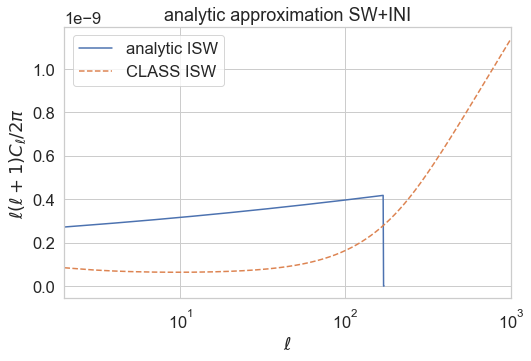

In [35]:
#plot
plt.figure()
plt.title('analytic approximation SW+INI')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
plt.plot(ell, cls['analytic ISW'], '-', label='analytic ISW')
plt.plot(ell, cls['CLASS ISW'], '--', label='CLASS ISW')
plt.legend()

# Plots for presentation

In [36]:
#Data from planck: http://pla.esac.esa.int/pla/#cosmology
data_planck = np.genfromtxt('../output/COM_PowerSpect_CMB-TT-full_R3.01.txt', skip_header=1).T
# data_planck = np.genfromtxt('../output/COM_PowerSpect_CMB-TT-binned_R3.01.txt', skip_header=1).T
data_planck[1:] *= 1.35e-13 # TODO_GWB: find correct conversion factor!

l_max = (int) (data_planck[0,-1])
common_settings = {
    'output':'tCl, gwCl',
    'tau_ini_gwb': 1e-2,
    'l_max_scalars': l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()

#TODO_GWB: plot real space interface

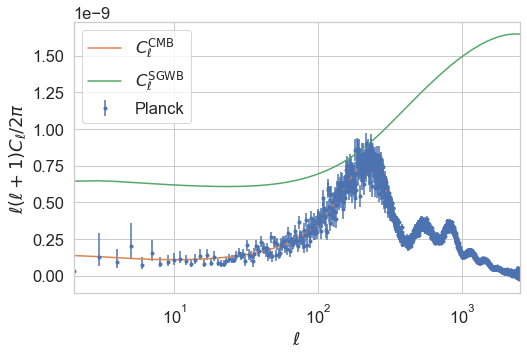

In [37]:
# sns.set_theme(context='presentation', style='whitegrid', font_scale=1.5, rc={"figure.figsize":(8,5)})
plt.figure()
plt.xlim([2,l_max])
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")

#plot planck data
plt.errorbar(data_planck[0], data_planck[1], yerr=data_planck[2:4], fmt='.', label='Planck')
# plt.plot(data_planck[0], data_planck[4], label='best fit')

plt.plot(ell,factor*cl['tt'],label=r'$C_\ell^\mathrm{CMB}$')
plt.plot(ell,factor*cl['gwb'],label=r'$C_\ell^\mathrm{SGWB}$')
# plt.plot(ell,factor*cl['tgwb'],label=r'$C_\ell^\mathrm{TGWB}$')

plt.legend()
plt.savefig('plot_Cl.pdf')

# Plots for parameter comparison

In [38]:
l_max = 2500
# l_max = 250
l_max_scalars = max(l_max, 1000)
tau_ini_gwb = 1e-2

"Precision parameter"
# label = 'output'
# values = ['gwCl', 'gwCl, tCl']

# label = 'l_max_scalars'
# values = [100, 500, 1000, 2000, 3000]

# label = 'tau_ini_gwb'
# values = np.logspace(-2, 2, 5)
# values = np.logspace(-6, -1, 6)

# label = 'start_small_k_at_tau_c_over_tau_h'
# values = [0.0015, 0.005, 0.0005]
# label = 'start_sources_at_tau_c_over_tau_h'
# values = [0.008, 0.005, 0.0005]

"Physical parameter"
# label = 'h' #h = 0.67810
# values = np.linspace(0.5, 0.8, 5)

# label = 'omega_b' #omega_b = 0.02238280
# values = np.linspace(0.005, 0.035, 5)

# label = 'N_ur' #N_ur = 3.044
# values = np.linspace(3, 4, 5)

# label = 'omega_cdm' #omega_cdm = 0.1201075
# values = np.linspace(0.05, 0.25, 5)

# label = 'omega_cdm' #omega_cdm = 0.1201075
# values = np.linspace(0.05, 0.25, 5)

label = 'ln10^{10}A_s' #ln10^{10}A_s = 3.04478383
values = np.linspace(2, 4, 5)

label = 'n_s' #n_s = 0.9660499
values = np.linspace(0.9, 1.1, 5)

# label = 'z_reio' #z_reio = 7.6711
# values = np.linspace(6, 8, 5)

cls = {}
ells = {}
M = Class()

common_settings = {
    'output':'gwCl',
    'gravitational_wave_contributions':'tsw, eisw, lisw',
    'tau_ini_gwb':tau_ini_gwb,
    'l_max_scalars':l_max_scalars,
    'write_warnings':'yes'}


for x in values:
    M.set(common_settings)
    M.set({label: x})
    M.compute()
    # l_max = x
    cl = M.raw_cl(l_max)
    ell = cl['ell']
    ells.update({x: ell})
    factor = ell*(ell+1.) / (2 * np.pi)
    cls.update({x: factor * cl['gwb']})
    M.empty()

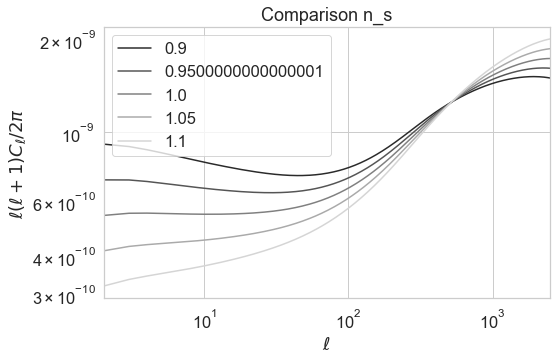

In [39]:
# comparison plots
sns.set_palette("gray", len(values))
plt.figure()
plt.title('Comparison %s' % label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])

for x in values:
    plt.plot(ells[x], cls[x], label=x)

plt.legend()
# plt.savefig("comparision_%s.png" % label)